Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2023/2024 
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija

**Rok za predaju: 9. svibnja 2024. (četvrtak) u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje. 

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** 

**Na ovoj vježbi možete ostvariti ukupno 10 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 6 bodova. Bodovi iz bilježnice bit će uneseni u sustav prije Vašeg termina usmene obrane, na kojoj možete ostvariti preostala 4 boda. Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.**

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. Za ovu laboratorijsku vježbu, predaja Jupyter bilježnice i usmena obrana rješenja nisu obavezne. Možete predati bilježnicu bez dolaska na usmenu obranu, ali predaja bilježnice je nužan uvjet za usmenu obranu. Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente
# Učitajte sve potrebne biblioteke
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1234)


### 1. Skup podataka

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedećih 18 fondova:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `GLD` (SPDR Gold Trust) - zlato,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `USO` (United States Oil Fund) - nafta,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: 

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u danu $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte tjedne povrate te vizualizirajte matricu korelacije povrata. **U ostatku laboratorijske vježbe također koristite povrate, a ne cijene.** 

In [2]:
data = pd.read_csv("ETFprices.csv")

print(data.head())

         Date        AGG        IEF        LQD        SHY        TIP  \
0  2014-04-14  84.572395  84.265930  84.649323  74.341156  88.475441   
1  2014-04-21  84.728745  84.522636  84.995186  74.332344  88.843178   
2  2014-04-28  84.955460  84.903381  85.434845  74.349960  89.218719   
3  2014-05-05  85.118477  85.205627  85.554268  74.421257  89.327766   
4  2014-05-12  85.517883  85.827736  86.132446  74.474083  90.143326   

         TLT         GLD        DBC         USO        XLE        IJH  \
0  86.308838  124.750000  24.523346  301.279999  62.545979  23.148979   
1  87.312706  125.430000  24.458908  292.799988  62.842556  23.087145   
2  88.395012  125.059998  24.191948  290.320007  63.172844  23.341356   
3  87.453857  124.099998  24.026251  291.200012  63.139145  23.227983   
4  89.262062  124.500000  24.182743  297.839996  62.957165  23.203941   

         IWM         SPY        VTV        XLF        XLK        IYR  \
0  98.753563  155.767868  60.286011  14.641581  31.53065

In [3]:
returns = data.drop('Date', axis=1).pct_change(1)

returns

,AGG,IEF,LQD,SHY,TIP,TLT,GLD,DBC,USO,XLE,IJH,IWM,SPY,VTV,XLF,XLK,IYR,VNQ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001849,0.003046,0.004086,-0.000119,0.004156,0.011631,0.005451,-0.002628,-0.028147,0.004742,-0.002671,-0.011602,-0.000536,-0.000384,-0.000457,-0.007771,0.004366,0.004180
2,0.002676,0.004505,0.005173,0.000237,0.004227,0.012396,-0.002950,-0.010915,-0.008470,0.005256,0.011011,0.003763,0.009501,0.006283,0.006407,0.017902,0.017679,0.016095
3,0.001919,0.003560,0.001398,0.000959,0.001222,-0.010647,-0.007676,-0.006849,0.003031,-0.000533,-0.004857,-0.017852,-0.000532,0.000383,-0.002728,-0.001649,0.011960,0.013519
4,0.004692,0.007301,0.006758,0.000710,0.009130,0.020676,0.003223,0.006513,0.022802,-0.002882,-0.001035,-0.004181,0.000479,-0.002420,-0.008208,0.009634,0.004362,0.005659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.011906,-0.016592,-0.011099,-0.003790,-0.011804,-0.029144,-0.009522,0.026613,0.040485,0.038448,-0.009151,-0.021370,-0.003693,0.001770,0.004185,-0.008295,-0.028729,-0.028953
518,0.007415,0.009076,0.007977,0.003313,0.009688,0.011190,0.003205,-0.002197,0.004585,0.009174,0.019326,0.013142,0.025498,0.012686,0.015445,0.020814,-0.003966,-0.007278
519,0.001227,0.001693,0.002301,0.000245,0.000559,0.006810,0.026803,0.011449,0.026735,0.030010,0.021871,0.028107,0.003569,0.021407,0.020729,-0.006174,0.026767,0.031324
520,-0.012865,-0.016058,-0.017352,-0.004769,-0.007262,-0.034137,0.045790,0.033957,0.046615,0.038873,-0.017781,-0.027817,-0.008871,-0.013816,-0.013058,-0.008739,-0.030145,-0.029371


<Axes: >

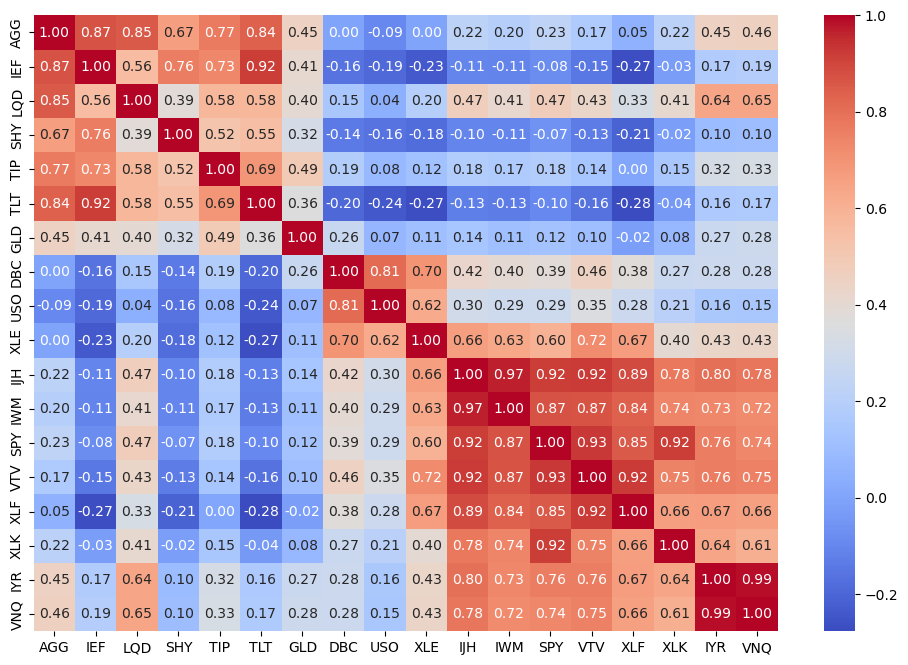

In [4]:
# korelacijska matrica
corr = returns.corr()

# vizualizacija korelacijske matrice
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt = ".2f")

### 2. Analiza glavnih komponenti

#### (a) 
Izračunajte rastav matrice korelacije na glavne komponente. Izračunajte i ispišite koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA()
pca.fit(corr)

ratio = pca.explained_variance_ratio_
ratio.sum() #provjera

for i, num in enumerate(ratio):
    print(f"Komponenta {i+1}: {round(num,3)}")


Komponenta 1: 0.782
Komponenta 2: 0.162
Komponenta 3: 0.023
Komponenta 4: 0.012
Komponenta 5: 0.006
Komponenta 6: 0.005
Komponenta 7: 0.005
Komponenta 8: 0.003
Komponenta 9: 0.001
Komponenta 10: 0.001
Komponenta 11: 0.001
Komponenta 12: 0.0
Komponenta 13: 0.0
Komponenta 14: 0.0
Komponenta 15: 0.0
Komponenta 16: 0.0
Komponenta 17: 0.0
Komponenta 18: 0.0


#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

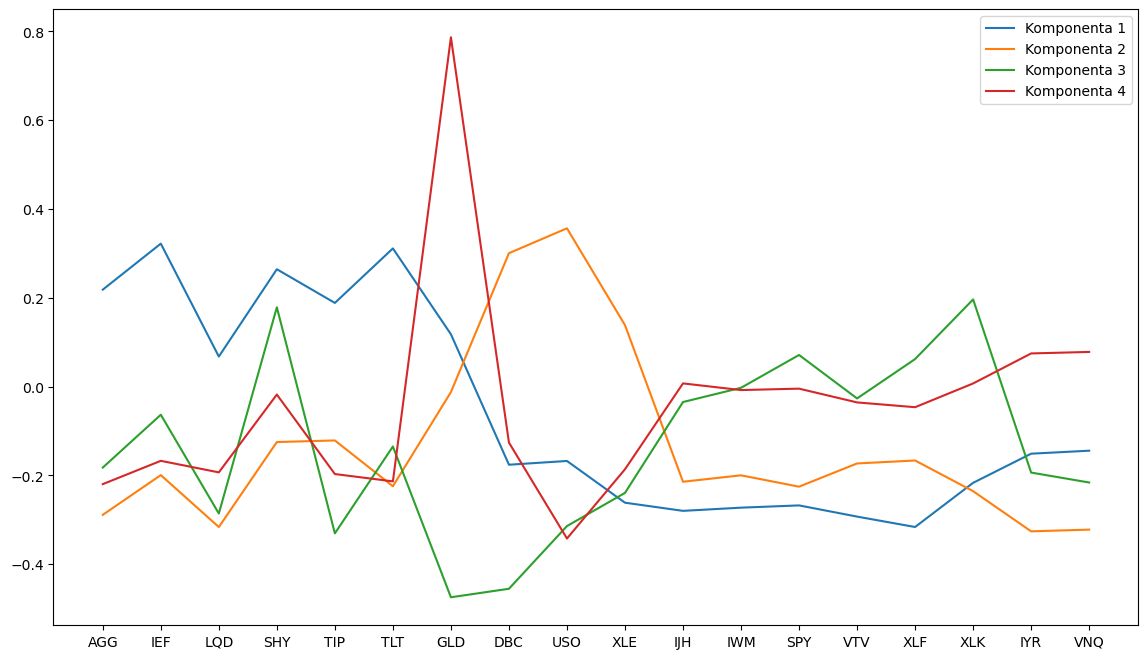

In [7]:
components = pca.components_

plt.figure(figsize=(14,8))
for i in range(4):
    plt.plot(corr.columns, components[i], label=f'Komponenta {i+1}')
plt.legend()


#### (c) 
Prikažite graf raspršenja koeficijenata prve dvije glavne komponente. Naznačite oznake fondova i proučite možete li primijetiti neke zanimljive grupe.

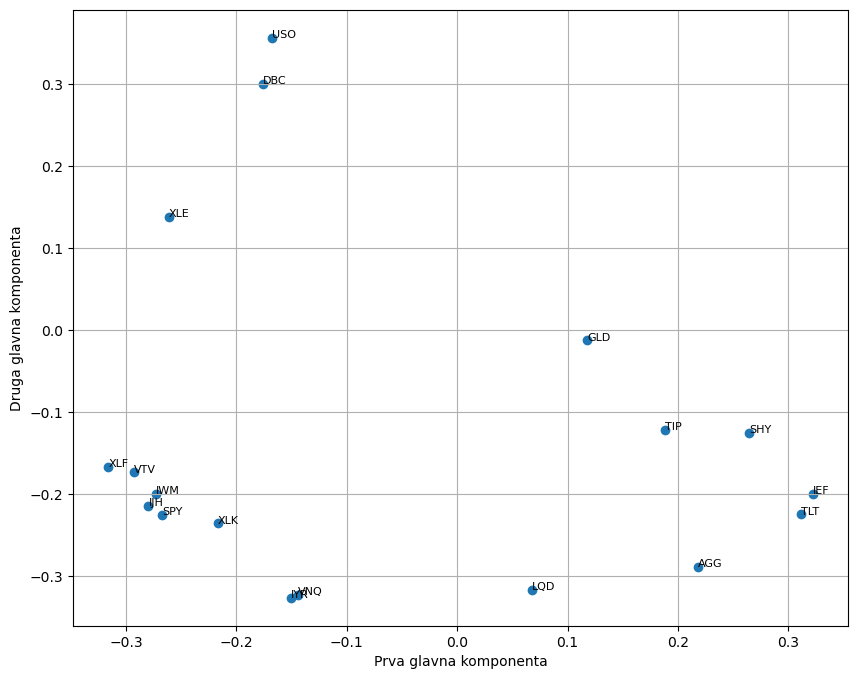

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(components[0], components[1])

for i, stock in enumerate(corr.columns):
    plt.annotate(stock, (components[0][i], components[1][i]), fontsize=8)

plt.xlabel('Prva glavna komponenta')
plt.ylabel('Druga glavna komponenta')
plt.grid(True)
plt.show()



#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. U ovom slučaju težine pojedinog svojstvenog portfelja su jednake elementima svojstvenih vektora ($w_j = e_{ij}$, gdje je $e_i$ $i$-ti svojstveni vektor). Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$ tako da: 
- pomnožite njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna,
- skalirate svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti: $\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Ispišite težine oba portfelja.

Svojstveni portfelj 0: [-0.0541248  -0.07980603 -0.01678462 -0.06551472 -0.04671437 -0.07713913
 -0.02923344  0.0435783   0.0414824   0.06477112  0.0693205   0.06754141
  0.06628007  0.07252582  0.07833469  0.05368243  0.03741731  0.03574884]
Svojstveni portfelj 1: [ 0.07319305  0.05050722  0.08016686  0.03163628  0.03072469  0.05686872
  0.00312712 -0.07620722 -0.09040249 -0.03511474  0.05430457  0.05064042
  0.05712199  0.04385969  0.04217128  0.0596866   0.08262759  0.08163947]

Svojstveni portfelj 0:
Srednja vrijednost povrata: 0.00105
Varijanca povrata: 0.00026

Svojstveni portfelj 1:
Srednja vrijednost povrata: 0.00115
Varijanca povrata: 0.00017


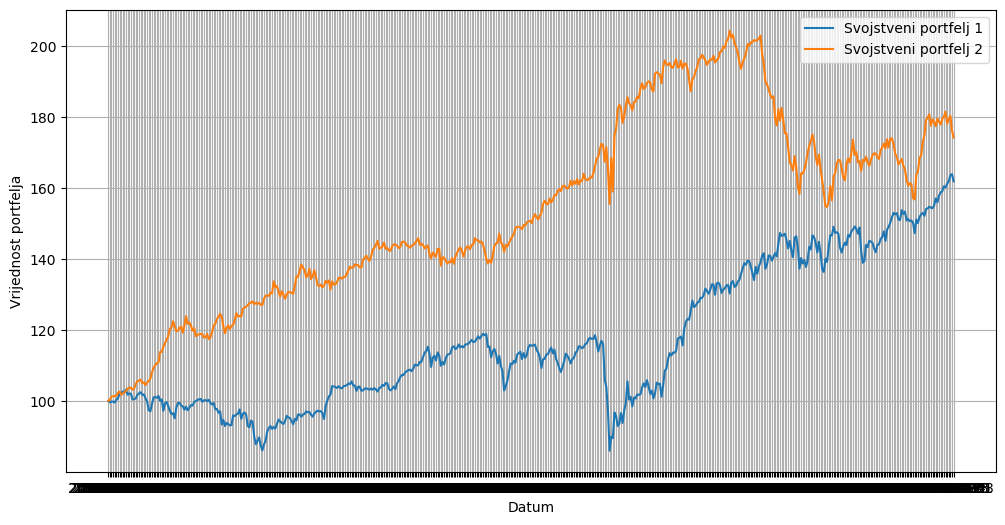

In [9]:
returns.fillna(0.0, inplace=True)

scaled_eig_portfolios = components[:2] * np.sign(components[:2].sum(axis=1))[:, np.newaxis]
scaled_eig_portfolios /= np.abs(scaled_eig_portfolios).sum(axis=1)[:, np.newaxis]

for i in range(2):
    print(f"Svojstveni portfelj {i}: {scaled_eig_portfolios[i]}")

returns_array = returns.to_numpy()
portfolio_returns = np.dot(returns_array, scaled_eig_portfolios.T)

mean_p_r = portfolio_returns.mean(axis=0)
var_p_r = portfolio_returns.var(axis=0)

for i in range(2):
    print(f"\nSvojstveni portfelj {i}:")
    print(f"Srednja vrijednost povrata: {round(mean_p_r[i],5)}")
    print(f"Varijanca povrata: {round(var_p_r[i],5)}")

value = 100
portfolio_values = np.cumprod(1 + portfolio_returns, axis=0) * value

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.plot(data['Date'], portfolio_values[:, i], label=f'Svojstveni portfelj {i+1}')

plt.xlabel('Datum')
plt.ylabel('Vrijednost portfelja')
plt.legend()
plt.grid(True)
plt.show()


Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Povrate portfelja $w$ računamo kao $R_w = \sum_j^N{R_{j} w_j} = R\cdot w$, gdje je $R_{j}$ povrat vrijednosnice $j$. Izračunajte srednje vrijednosti i varijance oba svojstvena portfelja. Također, grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). 

Razmislite kolika bi bila varijanca $R_w$ ukoliko portfelji ne bi bili skalirani tj. da vrijedi $\tilde{w}_j = w_j$.

In [10]:
unscaled_eig_p = components[:2]
unscaled_p_r = np.dot(returns_array, unscaled_eig_p.T)
var_unscaled_p_r = unscaled_p_r.var(axis=0)

# Ispis varijanci
for i in range(2):
    print(f"\nSvojstveni portfelj {i}:")
    print(f"Varijanca povrata (neskalirano): {var_unscaled_p_r[i]:.5f}")



Svojstveni portfelj 0:
Varijanca povrata (neskalirano): 0.00421

Svojstveni portfelj 1:
Varijanca povrata (neskalirano): 0.00261


### 3. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću metode glavnih komponenti i metode najveće izglednosti. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja?

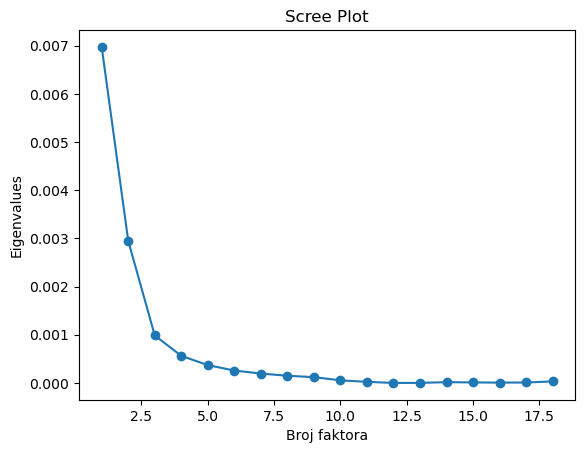

In [11]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
#pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

cov = np.cov(returns, rowvar=False)
eigenvalues = np.linalg.eigvals(cov)
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Broj faktora')
plt.ylabel('Eigenvalues')
plt.show()



In [12]:
# Faktorska analiza pomocu PCA
n = 5 
pca = PCA(n_components=n)
pca.fit(returns)
components = pca.components_


In [13]:
# Faktorska analiza pomocu MLE
fa = FactorAnalyzer(rotation=None, n_factors=n)
fa.fit(returns)

print("\nFaktori (PCA):")
print(pca.components_)
print("\nFaktori (MLE):")
print(fa.loadings_)



Faktori (PCA):
[[-0.01375113  0.0148974  -0.06997419  0.00299351 -0.01952782  0.04167278
  -0.03942914 -0.20490927 -0.4139087  -0.40895165 -0.30475775 -0.31912592
  -0.24238481 -0.25125268 -0.3038998  -0.23816478 -0.268385   -0.26973383]
 [ 0.04774805  0.04113628  0.10223567  0.00653658  0.0196428   0.1038189
   0.02596042 -0.24459321 -0.74438518 -0.18344234  0.18320231  0.189954
   0.15485049  0.11968476  0.16267198  0.19279803  0.27686748  0.27905397]
 [-0.15919961 -0.21433626 -0.25415468 -0.03167169 -0.16944768 -0.47297474
  -0.36983667 -0.11396995 -0.24438491  0.24929435  0.0883867   0.12983679
   0.06396166  0.10477229  0.3008552   0.03785721 -0.31280647 -0.33094884]
 [ 0.04570854  0.05190303  0.05352459  0.00828334  0.07195619  0.10920196
   0.26235002  0.10696805 -0.34225365  0.70396818 -0.04338245 -0.07110315
  -0.18856316  0.01677612  0.00860412 -0.48702811 -0.00241943  0.04637481]
 [ 0.09754045  0.13270734  0.09752659  0.02304927  0.14233261  0.30207218
   0.33536779  0.1010

#### (b)
Izračunajte varimax rotaciju koeficijenata faktora za obje metode iz (a). Razmislite o intepretaciji.

In [14]:
from factor_analyzer import Rotator

rotator_pca = Rotator(method='varimax')
rotated_pca = rotator_pca.fit_transform(pca.components_.T)

rotator_mle = Rotator(method='varimax')
rotated_mle = rotator_mle.fit_transform(fa.loadings_)

print(f"Rotirani koeficijenti faktora (PCA):\n{rotated_pca}")
print(f"\nRotirani koeficijenti faktora (MLE):\n{rotated_mle}")


Rotirani koeficijenti faktora (PCA):
[[-7.44453010e-03 -2.48182840e-04 -1.97130096e-01 -3.23970498e-03
  -2.21504579e-02]
 [ 2.12472687e-02 -4.90909572e-03 -2.59266130e-01 -1.99424739e-02
  -8.19433304e-03]
 [-4.27188156e-02 -9.13199030e-03 -2.82140700e-01 -1.12695182e-02
  -1.03347814e-01]
 [ 2.46149642e-03  2.23418648e-04 -4.04851942e-02 -2.73761394e-03
   1.41841599e-03]
 [-5.33633940e-03 -2.03798186e-02 -2.31707129e-01  2.48415894e-02
   1.29168788e-02]
 [ 4.29108890e-02  2.33973680e-03 -5.78330661e-01 -5.40805886e-02
  -1.24450432e-02]
 [ 1.77415185e-02 -2.76632879e-02 -5.42793080e-01  1.49842239e-01
   4.63659405e-02]
 [-1.74073255e-02 -2.92992549e-01 -1.27660499e-01  1.81241789e-01
   3.40412996e-02]
 [ 4.15070724e-02 -9.45920908e-01  9.94890225e-02 -8.84037157e-02
  -4.99046369e-02]
 [-1.52262011e-01 -8.13888365e-02 -3.91347030e-02  8.60704091e-01
   9.46331757e-02]
 [-3.59826162e-01  1.01750207e-02  8.30130946e-03  5.34090484e-02
  -8.51793670e-02]
 [-4.14205147e-01  1.3412413

#### (c)
Izračunajte specifične varijance za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

In [15]:
fa_c2 = FactorAnalyzer(n_factors=2, rotation = 'varimax', method='ml')
fa_c2.fit(returns)
spec_2 = fa_c2.get_uniquenesses()

fa_c3 = FactorAnalyzer(n_factors=3, rotation = 'varimax', method='ml')
fa_c3.fit(returns)
spec_3 = fa_c3.get_uniquenesses()


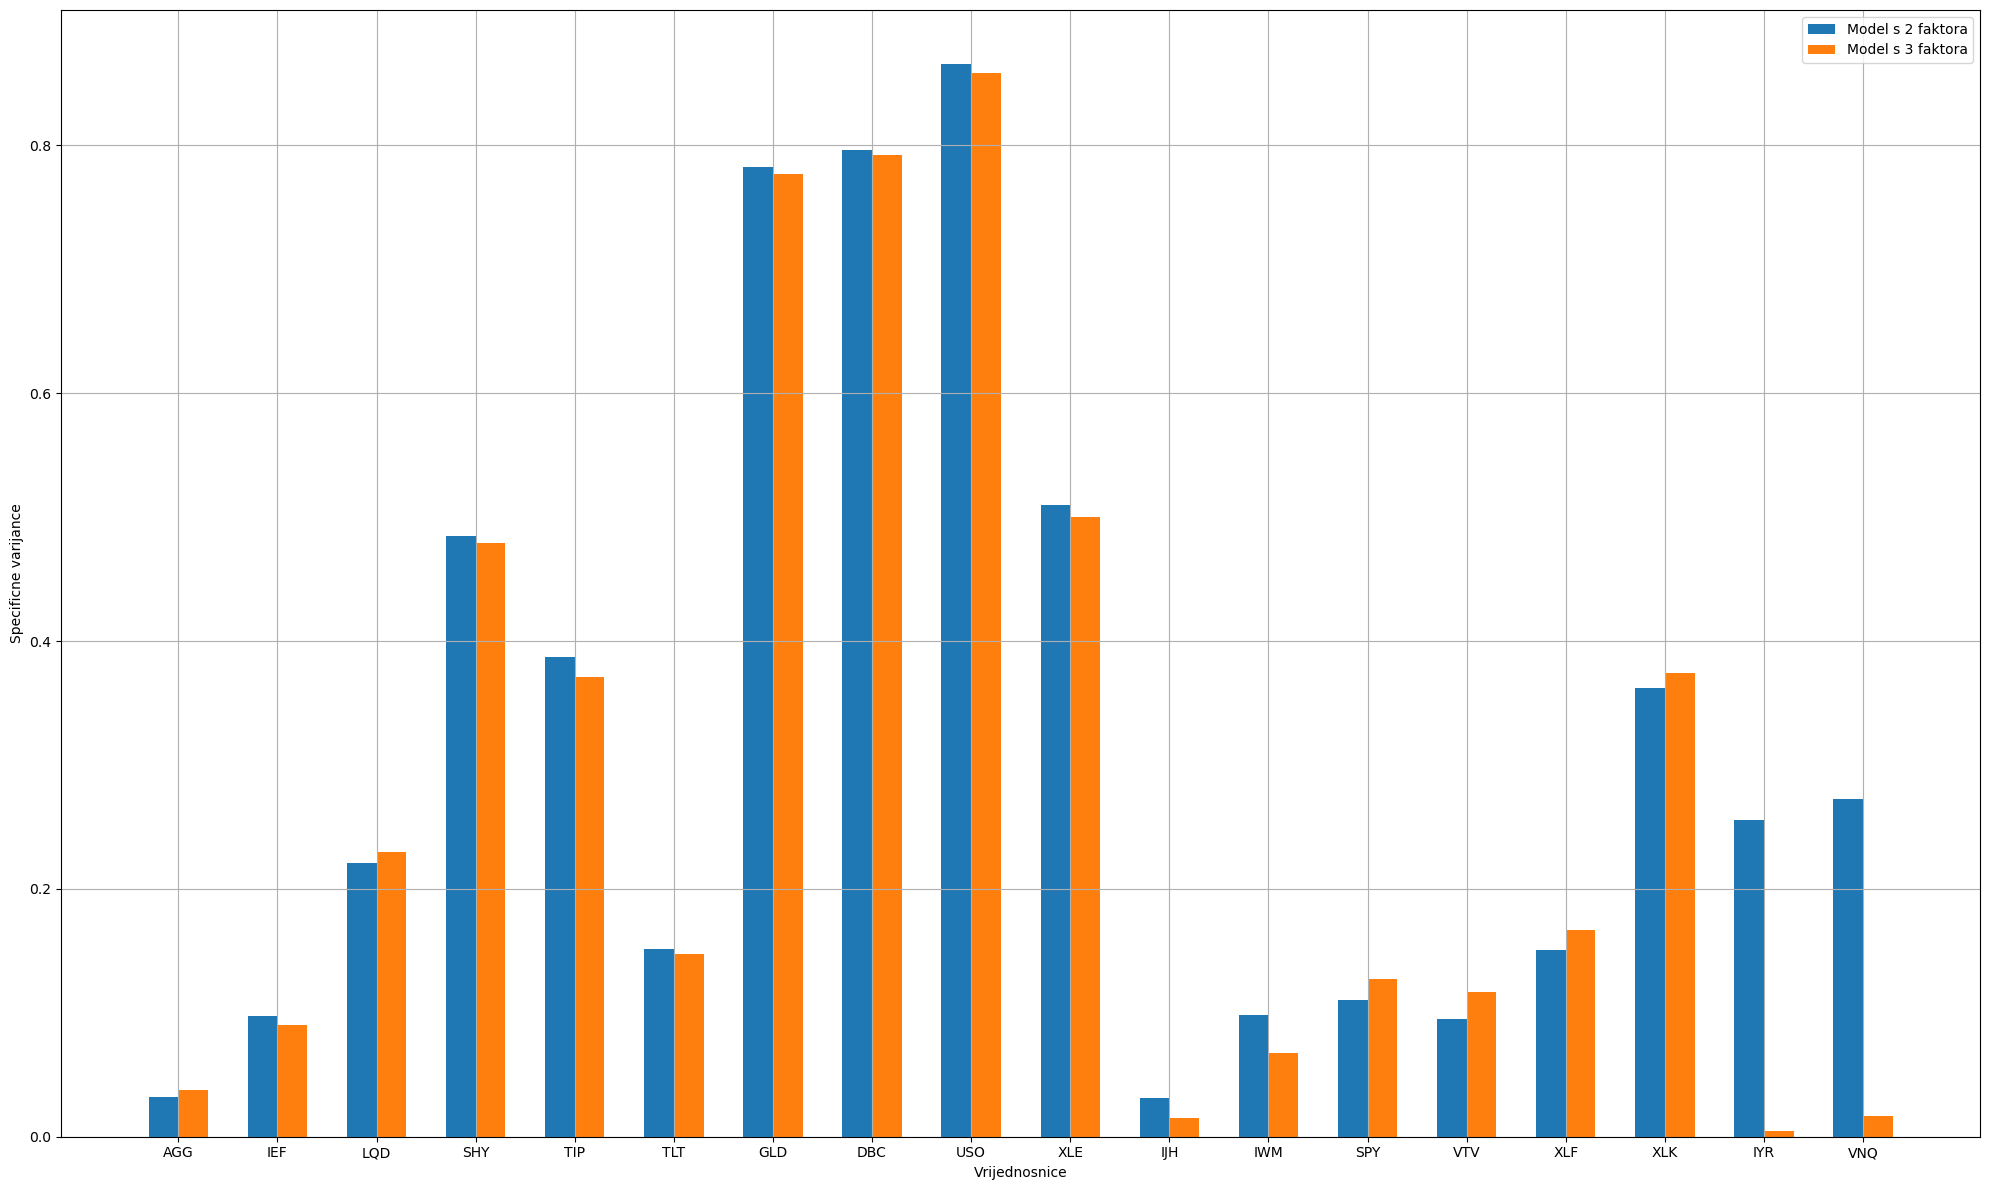

In [16]:
plt.figure(figsize=(20,12))
width = 0.3
etfs = np.arange(len(spec_2))
plt.bar(etfs, spec_2, width, label="Model s 2 faktora")
plt.bar(etfs+width, spec_3, width, label="Model s 3 faktora")
plt.ylabel("Specificne varijance")
plt.xlabel("Vrijednosnice")
plt.xticks(etfs+width/2, returns.columns)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Multivarijatna linearna regresija

#### (a)
Naučite tri odvojena modela univarijatne linearne regresije, čije zavisne varijable su redom `AGG`, `DBC` i `SPY`. Kod svih triju modela kao nezavisne varijable koristite sve preostale ETF-ove (sve osim tih triju). Za svaku regresiju ispišite koeficijente te njihovu signifikantnost. 

In [17]:
import statsmodels.api as sm

returns.fillna(0, inplace=True)

vars = ['AGG', 'DBC', 'SPY']

for var in vars:
    y = returns[var]  
    X1 = returns.drop([var], axis=1)
    X1 = sm.add_constant(X1)
    model = sm.OLS(y, X1).fit()
    
    print(f"Model za zavisnu varijablu: {var}\n{model.summary()}\n\n")


Model za zavisnu varijablu: AGG
                            OLS Regression Results                            
Dep. Variable:                    AGG   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     907.2
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        18:10:42   Log-Likelihood:                 2756.8
No. Observations:                 522   AIC:                            -5478.
Df Residuals:                     504   BIC:                            -5401.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -2.7e-0

#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove (svi osim ta tri). Usporedite koeficijente multivarijatne regresije s onima iz (a) podzadatka.

In [18]:
import statsmodels.api as sm
#!pip install linearmodels
from linearmodels import SUR

vars = ['AGG', 'DBC', 'SPY']
y = returns[vars]
X2 = returns.drop(vars, axis=1)

X2 = sm.add_constant(X2)
model = SUR.multivariate_ls(y, X2)
res=model.fit()

print(f"Multivarijatna linearna regresija:\n{res.summary}")


Multivarijatna linearna regresija:
                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.8690
No. Equations.:                     3   McElroy's R-squared:                 0.9621
No. Observations:                 522   Judge's (OLS) R-squared:             0.8690
Date:                Fri, May 17 2024   Berndt's R-squared:                  0.9998
Time:                        18:10:43   Dhrymes's R-squared:                 0.8690
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -3.875e-05  5.306e-05    -0.7303     0.4652  

#### (c)
Izračunajte i ispišite signifikantnost koeficijenata multivarijatne regresije iz podzadatka (b).

In [19]:
res.pvalues

AGG_const    0.465195
AGG_IEF      0.000000
AGG_LQD      0.000000
AGG_SHY      0.000031
AGG_TIP      0.029301
AGG_TLT      0.000049
AGG_GLD      0.292644
AGG_USO      0.064099
AGG_XLE      0.192454
AGG_IJH      0.081286
AGG_IWM      0.011513
AGG_VTV      0.626191
AGG_XLF      0.118208
AGG_XLK      0.741115
AGG_IYR      0.007302
AGG_VNQ      0.008919
DBC_const    0.845828
DBC_IEF      0.278295
DBC_LQD      0.610070
DBC_SHY      0.746394
DBC_TIP      0.017615
DBC_TLT      0.828707
DBC_GLD      0.000000
DBC_USO      0.000000
DBC_XLE      0.000003
DBC_IJH      0.578006
DBC_IWM      0.592428
DBC_VTV      0.867817
DBC_XLF      0.737216
DBC_XLK      0.658531
DBC_IYR      0.147902
DBC_VNQ      0.124933
SPY_const    0.087733
SPY_IEF      0.031201
SPY_LQD      0.148298
SPY_SHY      0.079395
SPY_TIP      0.053631
SPY_TLT      0.288925
SPY_GLD      0.032930
SPY_USO      0.764313
SPY_XLE      0.883250
SPY_IJH      0.019556
SPY_IWM      0.735268
SPY_VTV      0.000000
SPY_XLF      0.037119
SPY_XLK   